In [1]:
!pip install git+https://github.com/divamgupta/stable-diffusion-tensorflow --upgrade --quiet
!pip install tensorflow tensorflow_addons ftfy --upgrade --quiet
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package libcudnn8 is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Version '8.1.0.77-1+cuda11.2' for 'libcudnn8' was not found


In [2]:
! wget https://pyxis.nymag.com/v1/imgs/24c/d4a/6fdd64a7c835b8325065b72e6fbfe59fb9-09-family-drawing1.rsquare.w330.jpg -O inp.jpg

--2024-01-13 17:21:42--  https://pyxis.nymag.com/v1/imgs/24c/d4a/6fdd64a7c835b8325065b72e6fbfe59fb9-09-family-drawing1.rsquare.w330.jpg
Resolving pyxis.nymag.com (pyxis.nymag.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to pyxis.nymag.com (pyxis.nymag.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19240 (19K) [image/jpeg]
Saving to: ‘inp.jpg’

inp.jpg             100%[===================>]  18.79K  --.-KB/s    in 0s      

2024-01-13 17:21:43 (42.9 MB/s) - ‘inp.jpg’ saved [19240/19240]



In [3]:
from stable_diffusion_tf.stable_diffusion import StableDiffusion
from PIL import Image

generator = StableDiffusion(
    img_height=512,
    img_width=512,
    jit_compile=False,  # You can try True as well (different performance profile)
)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


136801296/136801296 [==============================] - 1s 0us/step


In [4]:

img = generator.generate(
    "a high quality sketch of people standing with sun and grass , watercolor , pencil color",
    num_steps=50,
    unconditional_guidance_scale=7.5,
    temperature=1,
    batch_size=1,
    input_image="inp.jpg",
    input_image_strength=0.8
)
pil_img = Image.fromarray(img[0])


  0   1: 100%|██████████| 40/40 [01:02<00:00,  1.57s/it]


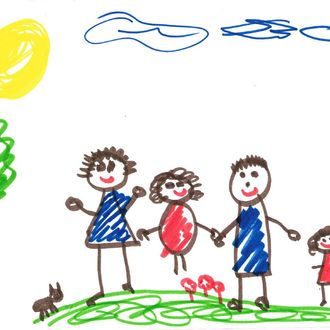

In [5]:
display(Image.open("inp.jpg"))

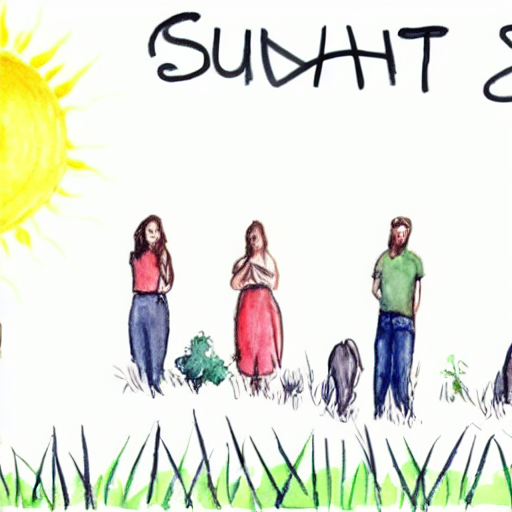

In [6]:
display(pil_img)